## Machine Learning For Selection of Appropriate Artificial Lift Technique

>Divyanshu Vyas (Oil and Gas Data Science (Machine Learning) Consultant

www.linkedin.com/in/divyanshu-vyas


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('ALS.csv',index_col=False)

df = df.iloc[:,1:]

In [10]:
df

,"DEPTH(TVD,ft)",Flow-RATE(bpd),Temperature(F),API GRAVITY,LABEL
0,10878.143422,20814.022380,287.118309,36.566497,Gas-Lift
1,8631.332818,2635.067440,304.069194,28.811594,SRP
2,2303.429459,684.280506,152.687094,13.745976,SRP
3,2987.234056,3376.023875,136.081863,15.270093,ESP
4,11394.914576,3509.794207,391.860717,36.416786,SRP
...,...,...,...,...,...
5995,10359.751076,7883.606777,272.675157,27.148606,Jet Pump
5996,10172.267152,7596.077089,263.490358,26.427341,Jet Pump
5997,5721.150763,4235.607393,238.334899,33.129422,PCP
5998,3836.394266,2447.347021,159.489878,20.486092,PCP


In [11]:
X = df.iloc[:,:-1]

In [13]:
set(df['LABEL'])

{'ESP', 'Gas-Lift', 'HPP', 'Jet Pump', 'PCP', 'SRP'}

In [14]:
def encoder(x):
    
    if x == 'ESP':
        return 0
    if x == 'Gas-Lift':
        return 1
    if x =='HPP':
        return 2
    if x == 'Jet Pump':
        return 3
    if x == 'PCP':
        return 4
    if x == 'SRP':
        return 5

In [40]:
names = {0:'ESP',
        1:'Gas-Lift',
        2:'Hydraulic-Piston Pump',
        3: 'Jet Pump',
        4: 'PCP',
        5: 'SRP',
        }

In [15]:
df['LABEL'] = df['LABEL'].apply(encoder)

In [16]:
df

,"DEPTH(TVD,ft)",Flow-RATE(bpd),Temperature(F),API GRAVITY,LABEL
0,10878.143422,20814.022380,287.118309,36.566497,1
1,8631.332818,2635.067440,304.069194,28.811594,5
2,2303.429459,684.280506,152.687094,13.745976,5
3,2987.234056,3376.023875,136.081863,15.270093,0
4,11394.914576,3509.794207,391.860717,36.416786,5
...,...,...,...,...,...
5995,10359.751076,7883.606777,272.675157,27.148606,3
5996,10172.267152,7596.077089,263.490358,26.427341,3
5997,5721.150763,4235.607393,238.334899,33.129422,4
5998,3836.394266,2447.347021,159.489878,20.486092,4


In [17]:
y = df['LABEL']

In [18]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
tree = DecisionTreeClassifier()

In [21]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
yp = tree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
#Model Evaluation

In [25]:
tree.score(X_test, y_test)

0.9961111111111111

In [26]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       280
           1       0.99      1.00      1.00       302
           2       1.00      0.99      1.00       301
           3       0.99      1.00      1.00       290
           4       1.00      1.00      1.00       318
           5       1.00      1.00      1.00       309

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [27]:
cm = confusion_matrix(y_test,yp)

Text(0.5, 1.0, 'The Diagonal represents correct classifications.')

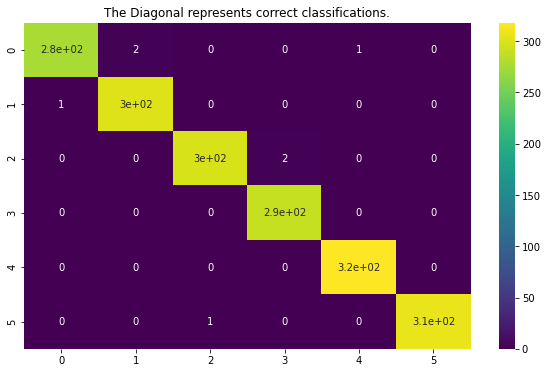

In [35]:
plt.figure(figsize=(10,6))

sns.heatmap(cm,annot=True,cmap='viridis')

plt.title('The Diagonal represents correct classifications.')

In [36]:
yprob = tree.predict_proba(X_test)

In [39]:
df[:5]

,"DEPTH(TVD,ft)",Flow-RATE(bpd),Temperature(F),API GRAVITY,LABEL
0,10878.143422,20814.022380,287.118309,36.566497,1
1,8631.332818,2635.067440,304.069194,28.811594,5
2,2303.429459,684.280506,152.687094,13.745976,5
3,2987.234056,3376.023875,136.081863,15.270093,0
4,11394.914576,3509.794207,391.860717,36.416786,5


In [41]:
###

In [42]:
###

In [43]:
###

In [46]:
#Test Cases

testCasedf = df[:5]
testcaseX = X[:5]

In [45]:
testCaseX

,"DEPTH(TVD,ft)",Flow-RATE(bpd),Temperature(F),API GRAVITY
0,10878.143422,20814.022380,287.118309,36.566497
1,8631.332818,2635.067440,304.069194,28.811594
2,2303.429459,684.280506,152.687094,13.745976
3,2987.234056,3376.023875,136.081863,15.270093
4,11394.914576,3509.794207,391.860717,36.416786


In [52]:
testCasedf

,"DEPTH(TVD,ft)",Flow-RATE(bpd),Temperature(F),API GRAVITY,LABEL
0,10878.143422,20814.022380,287.118309,36.566497,1
1,8631.332818,2635.067440,304.069194,28.811594,5
2,2303.429459,684.280506,152.687094,13.745976,5
3,2987.234056,3376.023875,136.081863,15.270093,0
4,11394.914576,3509.794207,391.860717,36.416786,5


In [53]:
model_p = tree.predict(testCaseX)

model_p



array([1, 5, 5, 0, 5], dtype=int64)

In [55]:
df_elaborate = df.copy()

In [56]:
def namer(n):
    
    return names[n]

In [57]:
df_elaborate['Lift technique'] = df_elaborate['LABEL'].apply(namer) 

In [58]:
df_elaborate

,"DEPTH(TVD,ft)",Flow-RATE(bpd),Temperature(F),API GRAVITY,LABEL,Lift technique
0,10878.143422,20814.022380,287.118309,36.566497,1,Gas-Lift
1,8631.332818,2635.067440,304.069194,28.811594,5,SRP
2,2303.429459,684.280506,152.687094,13.745976,5,SRP
3,2987.234056,3376.023875,136.081863,15.270093,0,ESP
4,11394.914576,3509.794207,391.860717,36.416786,5,SRP
...,...,...,...,...,...,...
5995,10359.751076,7883.606777,272.675157,27.148606,3,Jet Pump
5996,10172.267152,7596.077089,263.490358,26.427341,3,Jet Pump
5997,5721.150763,4235.607393,238.334899,33.129422,4,PCP
5998,3836.394266,2447.347021,159.489878,20.486092,4,PCP
